Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best accuracy for Decision Tree: 0.6213675213675213
Decision Tree Accuracy: 0.8181818181818182
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.81      0.89      0.85        19

    accuracy                           0.82        33
   macro avg       0.82      0.80      0.81        33
weighted avg       0.82      0.82      0.82        33



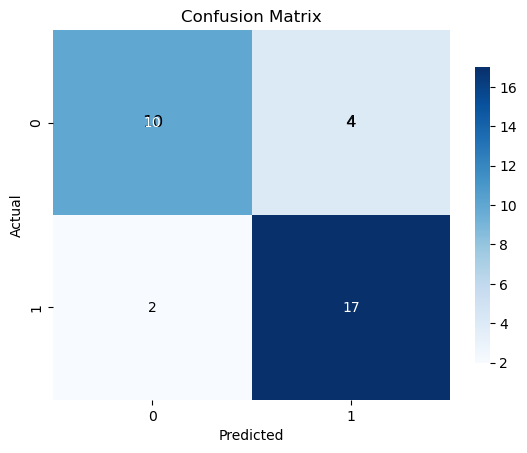

In [10]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
try:
    df = pd.read_excel('Gait_ML_featured_data.xlsx')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Splitting the data
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Best parameters and model evaluation
print(f"Best parameters for Decision Tree: {grid_search.best_params_}")
print(f"Best accuracy for Decision Tree: {grid_search.best_score_}")

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(Y_test, y_pred)}")
print(classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)

# Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12, "color": "black"},
            cbar_kws={"shrink": 0.8})

# Annotate heatmap with white or black text based on cell value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
        plt.text(j + 0.5, i + 0.5, cm[i, j], horizontalalignment='center', 
                 verticalalignment='center', color=color)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
